In [3]:
import numpy as np #needed for manipulation
import pandas as pd #needed for more cleaning.
import seaborn as sns # stastical visualization library
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('testms.csv') #This gets the data in the dataframe.
df = data.copy() # we create a copy, so that the original dataframe does not get destroyed.

In [5]:
df.shape #This reveals the number of rows and columns in the dataset.

(259, 27)

In [6]:
#We need to see the data
df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 09:29:37,25,Male,United States,PA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
1,2,2014-08-29 09:31:37,42,male,United States,IN,No,Yes,Sometimes,6-25,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
2,3,2014-08-29 09:31:49,34,male,United States,PA,No,Yes,Often,100-500,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN
3,4,2014-08-29 09:33:43,26,female,United States,OH,No,No,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes,NaN
4,5,2014-08-29 09:35:46,35,Male,United Kingdom,NaN,No,Yes,Sometimes,1-5,...,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes,NaN


In [7]:
#First, we need the info of total number of non empty columns.
info = df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 27 columns):
s.no                         259 non-null int64
Timestamp                    259 non-null object
Age                          259 non-null int64
Gender                       259 non-null object
Country                      259 non-null object
state                        144 non-null object
self_employed                259 non-null object
family_history               259 non-null object
work_interfere               221 non-null object
no_employees                 259 non-null object
remote_work                  259 non-null object
tech_company                 259 non-null object
benefits                     259 non-null object
care_options                 259 non-null object
wellness_program             259 non-null object
seek_help                    259 non-null object
anonymity                    259 non-null object
leave                        259 non-null object
mental_health_c

In [8]:
#We get the count of missing values only.
df.apply(lambda x: sum(x.isnull()))

s.no                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        115
self_employed                  0
family_history                 0
work_interfere                38
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     222
dtype: int64

In [9]:
#The comments quantity is insignificant, so lets drop it.
df.drop(columns='comments',inplace=True,axis=0)

In [10]:
df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,2014-08-29 09:29:37,25,Male,United States,PA,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
1,2,2014-08-29 09:31:37,42,male,United States,IN,No,Yes,Sometimes,6-25,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No
2,3,2014-08-29 09:31:49,34,male,United States,PA,No,Yes,Often,100-500,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
3,4,2014-08-29 09:33:43,26,female,United States,OH,No,No,Sometimes,26-100,...,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes
4,5,2014-08-29 09:35:46,35,Male,United Kingdom,NaN,No,Yes,Sometimes,1-5,...,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes


In [11]:
df['work_interfere'].unique()
#This tells us that, only five types of work_interfere_types exist
#Lets not keep nan as the value and replace that by a unique categfory U
df['work_interfere'] = df['work_interfere'].fillna('U')
df['work_interfere'].unique()

array(['Often', 'Sometimes', 'Never', 'U', 'Rarely'], dtype=object)

In [12]:
#Now, lets deal with the state.
country = list(df['Country'])
# print(country)
states=  list(df['state'])
# print(states)

#Lets replace all na by Other
df['state'] = df['state'].fillna('Other')
df.state.head(10)

0       PA
1       IN
2       PA
3       OH
4    Other
5    Other
6       PA
7       SD
8       IN
9       CA
Name: state, dtype: object

In [13]:
#Now, we don't have any missing values in the entire dataset, lets check once.
a = df.apply(lambda x: sum(x.isnull()))
print(a)

s.no                         0
Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [83]:
#We can take the s.no as our usual index, they will just differ by one as by default, that starts from zero.
#The timestamp data seems to be in proper format, so we have no need to alter that.

In [14]:
#We have all the age in proper fromat, no missing values and stuff, so age is proper.
#Gender.
df.Gender.unique()

array(['Male', 'male', 'female', 'm', 'M', 'F', 'Female',
       'Female (trans)', 'f', 'Malr', 'Male ', 'p', 'Woman', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [16]:
#Looking at the array, we see that, that, we have genders of various types,
# so we will club all reprsenting males into M and all representing females as F.
#Now, three values, "cis man","p","ostensibly male" is ambiguous, lets assign them as U.
#Have to try a better way to change, works for time being.

X = df['Gender']
for i in range(0,259):
    if(X[i][0] == 'M' or X[i][0] == 'm'):
        X[i] = 'M'
    elif (X[i][0] == 'F' or X[i][0] == 'f' or X[i][0] == 'W'):
        X[i] = 'F'
    else:
        X[i] = 'U'
df['Gender'] = X

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [17]:
df['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

In [18]:
df.head(100)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,2014-08-29 09:29:37,25,M,United States,PA,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
1,2,2014-08-29 09:31:37,42,M,United States,IN,No,Yes,Sometimes,6-25,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No
2,3,2014-08-29 09:31:49,34,M,United States,PA,No,Yes,Often,100-500,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
3,4,2014-08-29 09:33:43,26,F,United States,OH,No,No,Sometimes,26-100,...,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes
4,5,2014-08-29 09:35:46,35,M,United Kingdom,Other,No,Yes,Sometimes,1-5,...,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes
5,6,2014-08-29 09:36:04,34,M,United Kingdom,Other,No,No,Never,500-1000,...,Don't know,Very easy,Maybe,No,Yes,Yes,No,No,Yes,No
6,7,2014-08-29 09:36:46,38,M,United States,PA,No,Yes,Sometimes,100-500,...,Yes,Very easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
7,8,2014-08-29 09:40:13,34,M,United States,SD,No,No,Sometimes,100-500,...,Don't know,Don't know,Yes,No,Some of them,No,No,Maybe,Don't know,No
8,9,2014-08-29 09:42:23,39,M,United States,IN,No,Yes,Sometimes,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,Maybe,Yes,Yes,No
9,10,2014-08-29 09:46:56,44,F,United States,CA,No,No,U,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,Don't know,No


In [ ]:
#NOw, we have only M,F,U.

In [19]:
#Now, lets work on countries.
df.Country.unique()

array(['United States', 'United Kingdom', 'Israel', 'Canada', 'Australia',
       'Italy', 'Brazil', 'Switzerland', 'Germany', 'South Africa',
       'Greece', 'Netherlands', 'France', 'India', 'Croatia',
       'New Zealand', 'Moldova', 'Sweden', 'Belgium', 'Singapore',
       'Poland', 'Colombia', 'Georgia', 'China', 'Bulgaria', 'Ireland',
       'Czech Republic', 'Philippines', 'Finland'], dtype=object)

In [129]:
#Everything is fine with Country.

In [20]:
df.state.head(100)
#This is also pretty fine.

0        PA
1        IN
2        PA
3        OH
4     Other
5     Other
6        PA
7        SD
8        IN
9        CA
10       TN
11       TX
12       TN
13       OR
14       SD
15    Other
16       NY
17       CT
18       CA
19    Other
20    Other
21       GA
22       TN
23    Other
24       IN
25       CA
26       OR
27       IN
28       GA
29       IN
      ...  
70       OH
71       OH
72       IL
73       IN
74       CA
75       WA
76       VA
77       WA
78       NJ
79    Other
80       UT
81    Other
82       TN
83    Other
84    Other
85    Other
86    Other
87       IN
88       IN
89       CA
90       OH
91       TX
92       TN
93       WA
94       UT
95       AL
96       WI
97       WA
98       WI
99       NY
Name: state, Length: 100, dtype: object

In [21]:
df.head(10)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,2014-08-29 09:29:37,25,M,United States,PA,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
1,2,2014-08-29 09:31:37,42,M,United States,IN,No,Yes,Sometimes,6-25,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No
2,3,2014-08-29 09:31:49,34,M,United States,PA,No,Yes,Often,100-500,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No
3,4,2014-08-29 09:33:43,26,F,United States,OH,No,No,Sometimes,26-100,...,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Maybe,Don't know,Yes
4,5,2014-08-29 09:35:46,35,M,United Kingdom,Other,No,Yes,Sometimes,1-5,...,Yes,Very easy,Yes,Yes,Some of them,Some of them,No,Maybe,Yes,Yes
5,6,2014-08-29 09:36:04,34,M,United Kingdom,Other,No,No,Never,500-1000,...,Don't know,Very easy,Maybe,No,Yes,Yes,No,No,Yes,No
6,7,2014-08-29 09:36:46,38,M,United States,PA,No,Yes,Sometimes,100-500,...,Yes,Very easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
7,8,2014-08-29 09:40:13,34,M,United States,SD,No,No,Sometimes,100-500,...,Don't know,Don't know,Yes,No,Some of them,No,No,Maybe,Don't know,No
8,9,2014-08-29 09:42:23,39,M,United States,IN,No,Yes,Sometimes,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,Maybe,Yes,Yes,No
9,10,2014-08-29 09:46:56,44,F,United States,CA,No,No,U,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,Don't know,No


In [48]:
#Lets look at type of values of self employed
df.self_employed.unique() 
#This is a perfect one with No and Yes.
# self_employed = {'Yes':0,'No':1}
# df.self_employed = [self_employed[item] for item in df.self_employed]
# df.self_employed.unique()

array([1, 0])

In [53]:
df.family_history.unique()
family_history = {'Yes':0,'No':1}
df.family_history = [family_history[item] for item in df.family_history]
df.self_employed.unique()
#Even this is awesome.

array([1, 0])

In [54]:
df.work_interfere.unique()
#Even, these are perfect 5 categories.
work_interfere = {'Often':0,'Sometimes':1,'Never':2,'U':3,'Rarely':4}
df.work_interfere = [work_interfere[item] for item in df.work_interfere]
df.work_interfere.unique()

array([0, 1, 2, 3, 4])

In [25]:
#Now, we have to look at the number of employees.
df.no_employees.unique()
#These ranges look fine, can be clubbed together, but that depends on the model used, clubbing mkisgt be useful in visualizations.

array(['6-25', '100-500', '26-100', '1-5', '500-1000', 'More than 1000'],
      dtype=object)

In [55]:
df.anonymity.unique()
anonymity = {'Yes':0,'No':1,"Don't know":2}
df.anonymity = [anonymity[item] for item in df.anonymity]
df.anonymity.unique()
#Perfect as well.

array([0, 2, 1])

In [56]:
df.leave.unique()
leave = {'Somewhat easy':0, "Don't know":1, 'Very easy':2, 'Somewhat difficult':3,'Very difficult':4}
df.leave = [leave[item] for item in df.leave]
df.leave.unique()
#These are the 5 categories, can be clubbed according to the model.

array([0, 1, 2, 3, 4])

In [57]:
df.mental_health_consequence.unique()
mental_health_consequence = {'Yes':0, "No":1, 'Maybe':2}
df.mental_health_consequence = [mental_health_consequence[item] for item in df.mental_health_consequence]
df.mental_health_consequence.unique()
#This is also super perfect

array([1, 2, 0])

In [59]:
df.coworkers.unique()
coworkers = {'Yes':0, 'Some of them':2, 'No':1}
df.coworkers = [coworkers[item] for item in df.coworkers]
df.coworkers.unique()
#Seems fine

array([0, 2, 1])

In [60]:
df.supervisor.unique()
supervisor = {'Yes':0, 'Some of them':2, 'No':1}
df.supervisor = [supervisor[item] for item in df.supervisor]
df.supervisor.unique()

array([0, 1, 2])

In [61]:
df.mental_health_interview.unique()

mental_health_interview = {'Yes':0, "No":1, 'Maybe':2}
df.mental_health_interview = [mental_health_interview[item] for item in df.mental_health_interview]
df.mental_health_interview.unique()
#This is perfect

array([2, 1, 0])

In [62]:
df.phys_health_interview.unique()

phys_health_interview = {'Yes':0, "No":1, 'Maybe':2}
df.phys_health_interview = [phys_health_interview[item] for item in df.phys_health_interview]
df.phys_health_interview.unique()
#This is perfect.

array([2, 1, 0])

In [63]:
df.mental_vs_physical.unique()

mental_vs_physical= {'Yes':0,'No':1,"Don't know":2}
df.mental_vs_physical = [mental_vs_physical[item] for item in df.mental_vs_physical]
df.mental_vs_physical.unique()
#This is perfect as well.

array([2, 0, 1])

In [64]:
df.obs_consequence.unique()
obs_consequence = {'Yes':0,'No':1,"Don't know":2}
df.obs_consequence = [obs_consequence[item] for item in df.obs_consequence]
df.obs_consequence.unique()
#Fine as well.

array([1, 0])

In [65]:
df.head(5)

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,start_range,end_range,Day,Month,Year
0,25,M,United States,1,0,0,6-25,Yes,Yes,Yes,...,0,2,2,2,1,6,25,29,8,2014
1,42,M,United States,1,0,1,6-25,Yes,Yes,Don't know,...,0,1,2,2,1,6,25,29,8,2014
2,34,M,United States,1,0,0,100-500,No,Yes,Yes,...,0,2,2,2,1,100,500,29,8,2014
3,26,F,United States,1,1,1,26-100,Yes,Yes,Don't know,...,1,2,2,2,0,26,100,29,8,2014
4,35,M,United Kingdom,1,0,1,1-5,No,Yes,No,...,2,1,2,0,0,1,5,29,8,2014


In [66]:
def func(x):
    if len(x.split("-")) != 1:
        return x.split("-")[1]
    else:
        return ""
a = df['no_employees'].apply(lambda x: x.split("-")[0])
b = df['no_employees'].apply(func)

In [67]:
df['start_range'] = a
df['end_range'] = b

#Guys, i don't know machine learning, this is my assumption, so i put it.

def func2(x):
    if x == "":
        return 10000
    else:
        return x

#I added these two columns becuase the values might be needed as parameters(integer) in the ML model.
#Now, the values with more than thousand has end_range as null, so lets add that as 10000 and convert the types as integer.
df['end_range']=df['end_range'].apply(func2)


In [68]:
def func3(x):
    if x[0] == "M":
        return "1000"
    else:
        return x
df['start_range']=df['start_range'].apply(func3)

In [69]:
df['start_range'] = pd.to_numeric(df['start_range'])

In [70]:
df['end_range'] = pd.to_numeric(df['end_range'])

In [ ]:
#There are no null values and hence the data is clean now.

In [72]:
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])
df['Day'] = pd.to_numeric(df['Day'])

In [73]:
df.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,start_range,end_range,Day,Month,Year
0,25,M,United States,1,0,0,6-25,Yes,Yes,Yes,...,0,2,2,2,1,6,25,29,8,2014
1,42,M,United States,1,0,1,6-25,Yes,Yes,Don't know,...,0,1,2,2,1,6,25,29,8,2014
2,34,M,United States,1,0,0,100-500,No,Yes,Yes,...,0,2,2,2,1,100,500,29,8,2014
3,26,F,United States,1,1,1,26-100,Yes,Yes,Don't know,...,1,2,2,2,0,26,100,29,8,2014
4,35,M,United Kingdom,1,0,1,1-5,No,Yes,No,...,2,1,2,0,0,1,5,29,8,2014


In [76]:
df.remote_work.unique()
remote_work = {'Yes':0,'No':1}
df.remote_work = [remote_work[item] for item in df.remote_work]
df.remote_work.unique()

KeyError: 0

In [78]:
df.tech_company.unique()
tech_company = {'Yes':0,'No':1}
df.tech_company = [tech_company[item] for item in df.tech_company]
df.tech_company.unique()

array([0, 1])

In [80]:
df.benefits.unique()
benefits= {'Yes':0,'No':1,"Don't know":2}
df.benefits = [benefits[item] for item in df.benefits]
df.benefits.unique()

array([0, 2, 1])

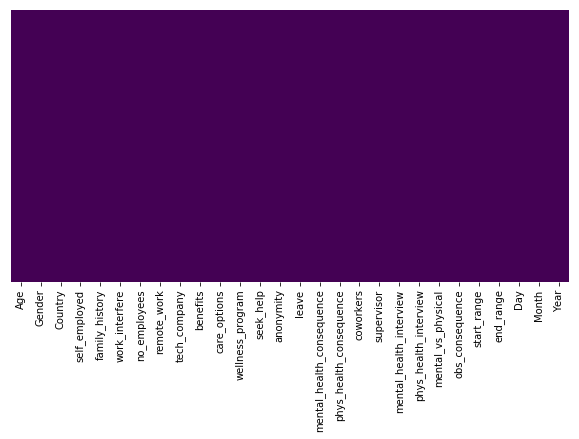

In [81]:
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()
#NOw, lets seee the heat map to get the null values.

In [ ]:
# Now, many unwanted columns can be deleted as follows, just add the columns to be dropped, i cant say as to what are not important


In [45]:
to_drop = ["s.no","Timestamp","state"]
df.drop(columns=to_drop,inplace=True,axis=1)
df.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,start_range,end_range,Day,Month,Year
0,25,M,United States,No,Yes,Often,6-25,Yes,Yes,Yes,...,Yes,Maybe,Maybe,Don't know,No,6,25,29,8,2014
1,42,M,United States,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,...,Yes,No,Maybe,Don't know,No,6,25,29,8,2014
2,34,M,United States,No,Yes,Often,100-500,No,Yes,Yes,...,Yes,Maybe,Maybe,Don't know,No,100,500,29,8,2014
3,26,F,United States,No,No,Sometimes,26-100,Yes,Yes,Don't know,...,No,Maybe,Maybe,Don't know,Yes,26,100,29,8,2014
4,35,M,United Kingdom,No,Yes,Sometimes,1-5,No,Yes,No,...,Some of them,No,Maybe,Yes,Yes,1,5,29,8,2014


In [85]:
df.Gender.unique()
Gender= {'M':0,'F':1,'U':2}
df.Gender = [Gender[item] for item in df.Gender]
df.Gender.unique()

array([0, 1, 2])

In [ ]:
#Convcersion of strings to 0,1,2,3 can be done at a shot, please tell and i will try to do.
#This was the first time i did it, so please bhaut galti hoga maaf karna :P

In [86]:
df.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,start_range,end_range,Day,Month,Year
0,25,0,United States,1,0,0,6-25,0,0,0,...,0,2,2,2,1,6,25,29,8,2014
1,42,0,United States,1,0,1,6-25,0,0,2,...,0,1,2,2,1,6,25,29,8,2014
2,34,0,United States,1,0,0,100-500,1,0,0,...,0,2,2,2,1,100,500,29,8,2014
3,26,1,United States,1,1,1,26-100,0,0,2,...,1,2,2,2,0,26,100,29,8,2014
4,35,0,United Kingdom,1,0,1,1-5,1,0,1,...,2,1,2,0,0,1,5,29,8,2014
